In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full10_df = pd.read_csv("full_10kb.csv", header=None)
full1000_df = pd.read_csv("full_1000kb.csv", header=None)
full100000_df = pd.read_csv("full_100000kb.csv", header=None)

no10_df = pd.read_csv("no_10kb.csv", header=None)
no1000_df = pd.read_csv("no_1000kb.csv", header=None)
no100000_df = pd.read_csv("no_100000kb.csv", header=None)

In [3]:
# full10_df.head()

In [4]:
# Set labels for the x-axis
component_DS = ["Create User", "Encrypt DE", "Create DE", "Create Policy"]
component_DS_axis = np.arange(len(component_DS))*1.5

In [5]:
# component_DS_axis[0]

In [6]:
full10_df.iloc[0].mean()

0.2830392849445343

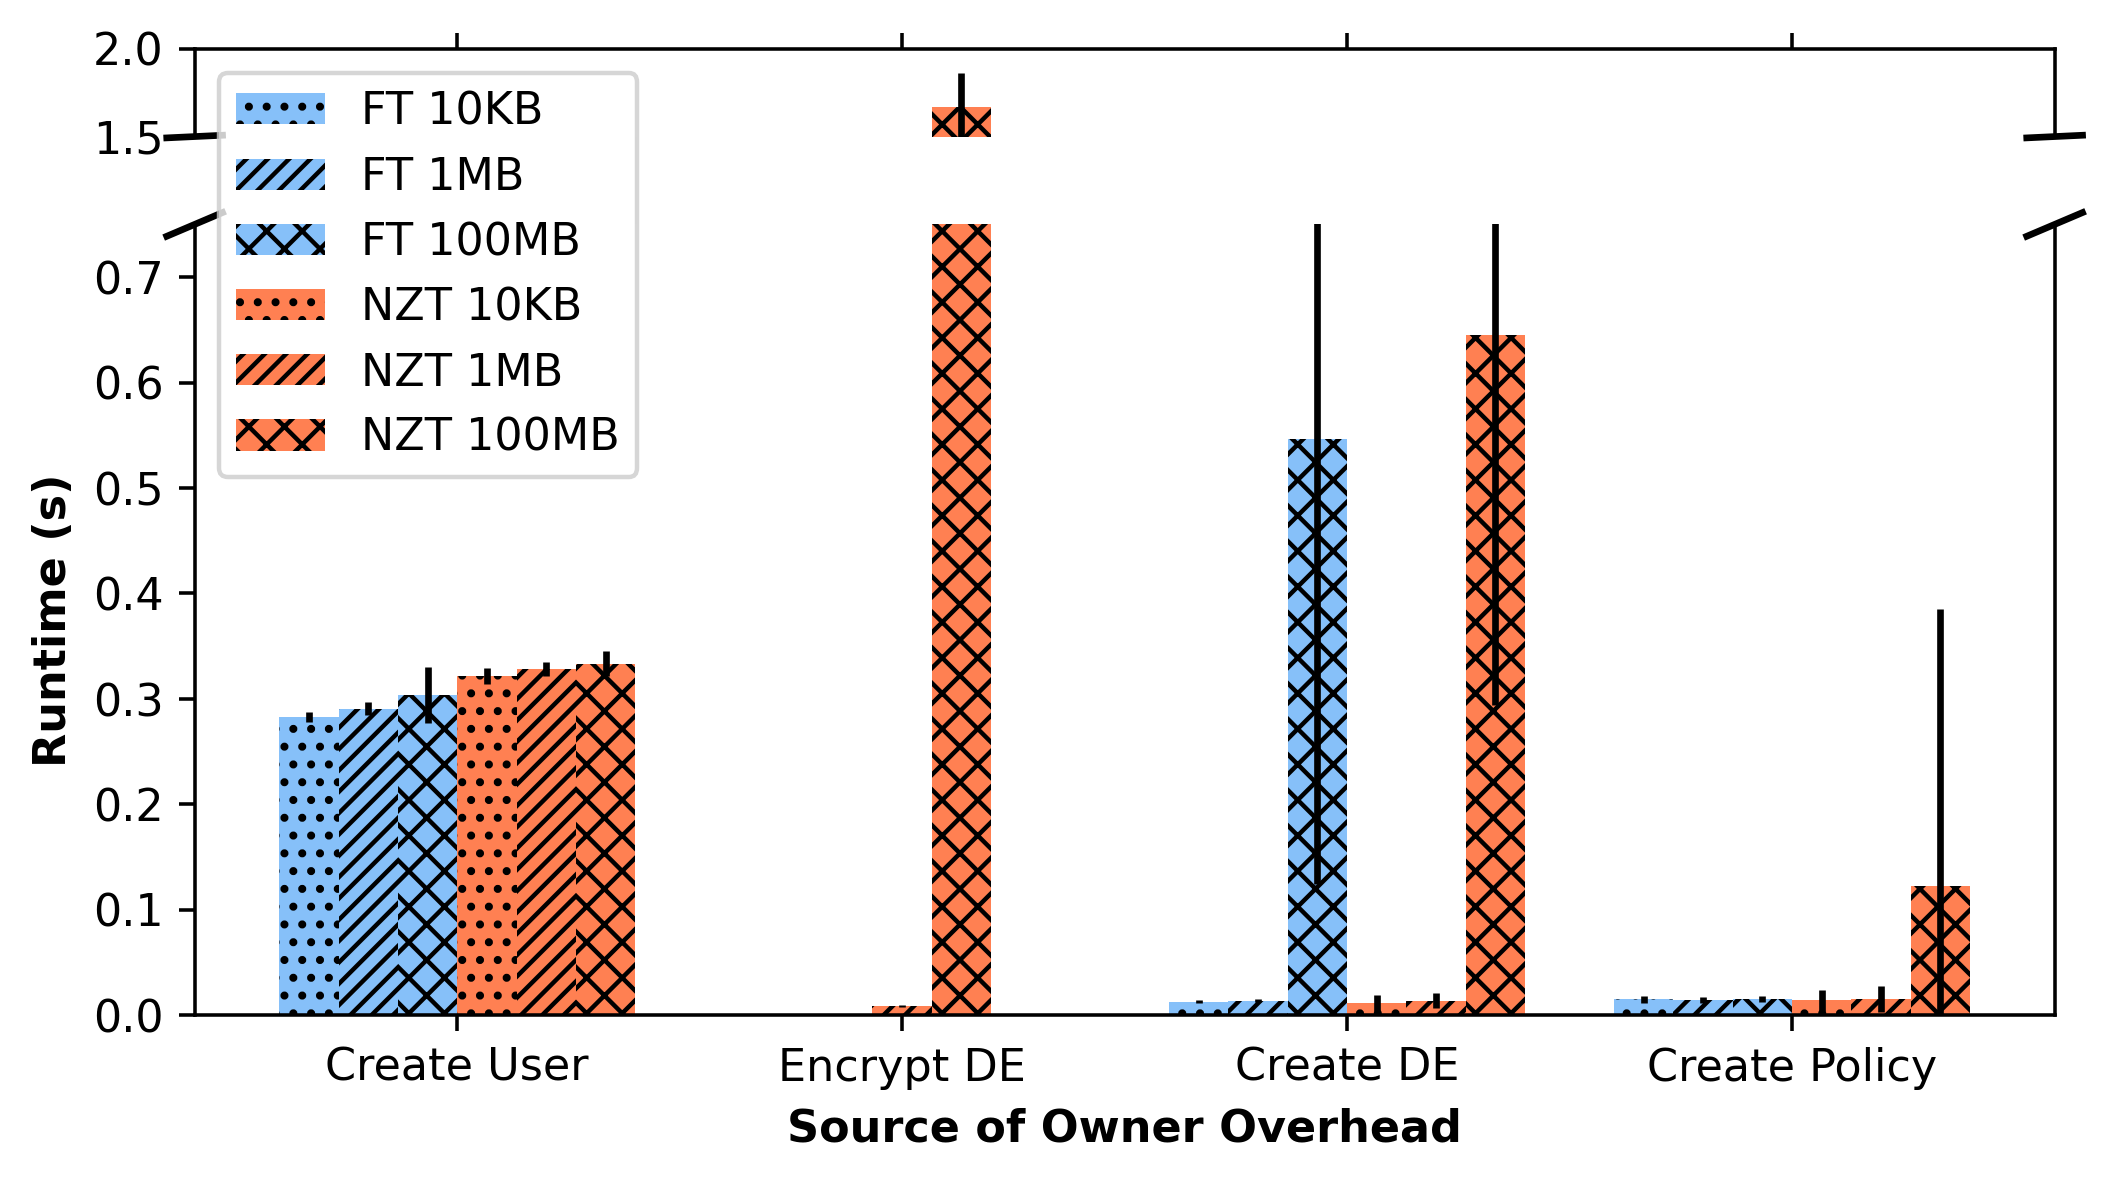

In [66]:
# plt.figure(figsize=(7.5, 4), dpi=320)

hatches = ['...','/////','///\\\\\\']

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,
                            gridspec_kw={'height_ratios': [1, 9]},
                            figsize=(7.5, 4) , dpi=320)

# First we plot the bars for full trust (CU, CD, CP)
for i in range(3):
        if i == 0:
                cur_df = full10_df
                cur_label = "FT 10KB"
        elif i == 1:
                cur_df = full1000_df
                cur_label = "FT 1MB"
        else:
                cur_df = full100000_df
                cur_label = "FT 100MB"
        ax2.bar(component_DS_axis[0]-0.5+i*0.2,
                cur_df.iloc[0].mean(),
                yerr=np.std(cur_df.iloc[0]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                label=cur_label,
                alpha=.99,
                )
        ax2.bar(component_DS_axis[2]-0.5+i*0.2,
                cur_df.iloc[1].mean(),
                yerr=np.std(cur_df.iloc[1]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                alpha=.99,
                )
        ax2.bar(component_DS_axis[3]-0.5+i*0.2,
                cur_df.iloc[2].mean(),
                yerr=np.std(cur_df.iloc[2]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                alpha=.99,
                )

# Then we plot the bars for near zero trust (CU, Enc, CD, CP)
for i in range(3):
        if i == 0:
                cur_df = no10_df
                cur_label = "NZT 10KB"
        elif i == 1:
                cur_df = no1000_df
                cur_label = "NZT 1MB"
        else:
                cur_df = no100000_df
                cur_label = "NZT 100MB"
        ax2.bar(component_DS_axis[0]+0.1+i*0.2,
                cur_df.iloc[0].mean(),
                yerr=np.std(cur_df.iloc[0]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                label=cur_label,
                alpha=.99,
                )
        ax2.bar(component_DS_axis[1]-0.2+i*0.2,
                cur_df.iloc[1].mean(),
                yerr=np.std(cur_df.iloc[1]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
                )
        ax2.bar(component_DS_axis[2]+0.1+i*0.2,
                cur_df.iloc[2].mean(),
                yerr=np.std(cur_df.iloc[2]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
                )
        ax2.bar(component_DS_axis[3]+0.1+i*0.2,
                cur_df.iloc[3].mean(),
                yerr=np.std(cur_df.iloc[3]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
                )

for i in range(3):
        if i == 0:
                cur_df = full10_df
                cur_label = "FT 10KB"
        elif i == 1:
                cur_df = full1000_df
                cur_label = "FT 1MB"
        else:
                cur_df = full100000_df
                cur_label = "FT 100MB"
        ax.bar(component_DS_axis[0]-0.5+i*0.2,
                cur_df.iloc[0].mean(),
                yerr=np.std(cur_df.iloc[0]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                label=cur_label,
                alpha=.99,
               )
        ax.bar(component_DS_axis[2]-0.5+i*0.2,
                cur_df.iloc[1].mean(),
                yerr=np.std(cur_df.iloc[1]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                alpha=.99,
               )
        ax.bar(component_DS_axis[3]-0.5+i*0.2,
                cur_df.iloc[2].mean(),
                yerr=np.std(cur_df.iloc[2]),
                width=0.2,
                color="#85C0F9",
                hatch=hatches[i],
                alpha=.99,
               )

# Then we plot the bars for near zero trust (CU, Enc, CD, CP)
for i in range(3):
        if i == 0:
                cur_df = no10_df
                cur_label = "NZT 10KB"
        elif i == 1:
                cur_df = no1000_df
                cur_label = "NZT 1MB"
        else:
                cur_df = no100000_df
                cur_label = "NZT 100MB"
        ax.bar(component_DS_axis[0]+0.1+i*0.2,
                cur_df.iloc[0].mean(),
                yerr=np.std(cur_df.iloc[0]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                label=cur_label,
                alpha=.99,
               )
        ax.bar(component_DS_axis[1]-0.2+i*0.2,
                cur_df.iloc[1].mean(),
                yerr=np.std(cur_df.iloc[1]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
               )
        ax.bar(component_DS_axis[2]+0.1+i*0.2,
                cur_df.iloc[2].mean(),
                yerr=np.std(cur_df.iloc[2]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
               )
        ax.bar(component_DS_axis[3]+0.1+i*0.2,
                cur_df.iloc[3].mean(),
                yerr=np.std(cur_df.iloc[3]),
                width=0.2,
                color="coral",
                hatch=hatches[i],
                alpha=.99,
               )

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# plt.ylim(0, 0.75)
ax.set_ylim(1.5, 2)
ax2.set_ylim(0, 0.75)
plt.xticks(component_DS_axis, component_DS)
ax2.legend(loc=1, bbox_to_anchor=(0.25,1.22))
plt.xlabel("Source of Owner Overhead", fontweight="bold")
plt.ylabel("Runtime (s)", fontweight="bold")
# plt.figure(figsize=(7.5, 4), dpi=320)
plt.savefig("owner_overhead.pdf", facecolor='w')